# Basic Demonstration of cEpiabm driven from Python

In [38]:
from epiabm import *
import time

## Initialization

In [39]:
LogFile.Instance().configure(2, "output/log.log") # Set logger to print warnings and above to console

### Load parameters to a SimulationConfig
cfg = JsonFactory().load_config("parameters.json")

### Create a toy population
# Create a population with 100,000 people split between 100 cells. Each cell has 100 microcells and each microcell has 25 households
population = None # Remove reference to old population if it exists (for testing, population constructor and destructor print to terminal)
population = ToyPopulationFactory().make_population(100000, 10, 100, 25, 0)
population.initialize()

### Randomly initialize 1 in 100 people as infected
r = RandomSeedSweep(10000)
r.bind_population(population)
r(0)

Created Population


## Configure a Simulation

In [40]:
simulation = BasicSimulation(population) # Create a simulation acting on the population

# Configure which sweeps to run
simulation.add_sweep(HouseholdSweep(cfg))
simulation.add_sweep(SpatialSweep(cfg))
simulation.add_sweep(NewInfectionSweep(cfg))
simulation.add_sweep(HostProgressionSweep(cfg))

# Configure what data to output
simulation.add_timestep_reporter(
    PopulationCompartmentReporter("output/population_results.csv"))

# Run Simulation
simulation.simulate(50000)

Deleted Population


In [41]:
import pandas as pd
results = pd.read_csv("output/population_results.csv")
results

,timestep,Susceptible,Exposed,InfectASympt,InfectMild,InfectGP,InfectHosp,InfectICU,InfectICURecov,Recovered,Dead
0,0,99991,9,0,0,0,0,0,0,0,0
1,1,99991,9,0,0,0,0,0,0,0,0
2,2,99991,9,0,0,0,0,0,0,0,0
3,3,99991,9,0,0,0,0,0,0,0,0
4,4,99991,9,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,70467,0,0,0,0,0,0,0,29102,431
9997,9997,70467,0,0,0,0,0,0,0,29102,431
9998,9998,70467,0,0,0,0,0,0,0,29102,431
9999,9999,70467,0,0,0,0,0,0,0,29102,431


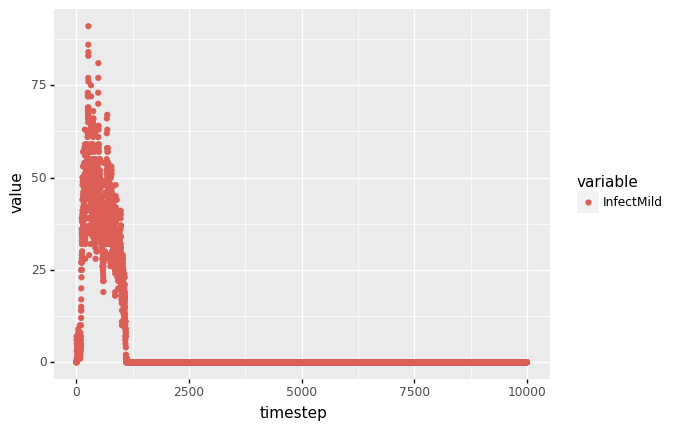

<ggplot: (8783069193102)>

In [42]:
from plotnine import *
(
    ggplot(results[['timestep', 'InfectMild']].melt('timestep'), aes(x='timestep', y='value', colour='variable')) +
    geom_point()
)